# Instacart - Exploratory Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
product_metadata = pd.read_csv('products.csv')
product_metadata.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [51]:
orders = pd.read_csv('orders.csv')
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


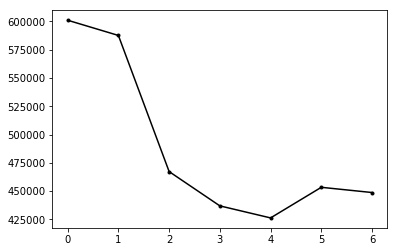

In [6]:
plt.plot(orders.groupby('order_dow')['order_id'].count(),'k.-')

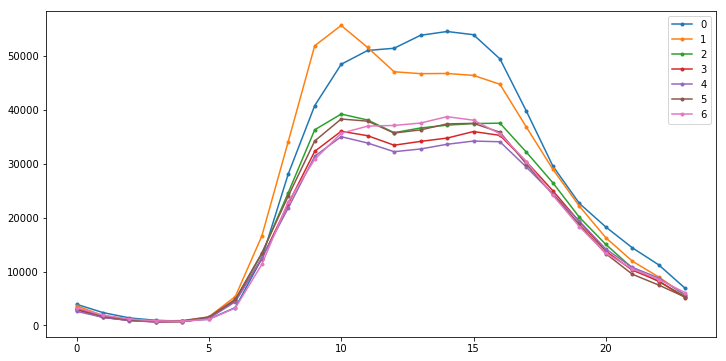

In [16]:
plt.figure(figsize=(12,6))
for d in range(7):
    plt.plot(orders[orders['order_dow']==d].groupby('order_hour_of_day')['order_id'].count()
             ,'.-',label=str(d))
plt.legend()

In [21]:
prior = pd.read_csv('order_products__prior.csv')
prior = prior.sort_values(['order_id','add_to_cart_order'])
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [52]:
# join order metadata to product level data
prior_orders = prior.merge(orders[['order_id','user_id','order_number']],on='order_id')
prior_orders = prior_orders.sort_values(['user_id','order_number','add_to_cart_order'])

In [60]:
prior_orders.head(30)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number
24076664,2539329,196,1,0,1,1
24076665,2539329,14084,2,0,1,1
24076666,2539329,12427,3,0,1,1
24076667,2539329,26088,4,0,1,1
24076668,2539329,26405,5,0,1,1
22742744,2398795,196,1,1,1,2
22742745,2398795,10258,2,0,1,2
22742746,2398795,12427,3,1,1,2
22742747,2398795,13176,4,0,1,2
22742748,2398795,26088,5,1,1,2


In [59]:
prior_orders.to_csv('prior_orders_extended.csv',index=False)

In [55]:
len(orders.user_id.drop_duplicates())

206209

In [53]:
len(prior.product_id.drop_duplicates())

49677

In [54]:
len(orders.order_id.drop_duplicates())

3421083

In [24]:
order_size = prior.groupby('order_id')['product_id'].count().reset_index()
order_size.columns = ['order_id','n_prods']
order_size.head()

,order_id,n_prods
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


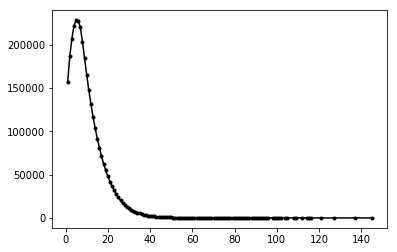

In [28]:
order_size_hist=order_size.groupby('n_prods')['order_id'].count().reset_index()
order_size_hist.columns = ['n_prods','freq']
plt.plot(order_size_hist['n_prods'],order_size_hist['freq'],'k.-')

In [42]:
product_summary = prior.groupby('product_id')['order_id'].count().reset_index()
product_summary.columns = ['product_id','orders']
product_metadata2 = product_metadata.merge(product_summary,on='product_id')
product_metadata2 = product_metadata2.sort_values('orders',ascending=False)
product_metadata2.head(30)

,product_id,product_name,aisle_id,department_id,orders
24848,24852,Banana,24,4,472565
13172,13176,Bag of Organic Bananas,24,4,379450
21133,21137,Organic Strawberries,24,4,264683
21899,21903,Organic Baby Spinach,123,4,241921
47198,47209,Organic Hass Avocado,24,4,213584
47755,47766,Organic Avocado,24,4,176815
47615,47626,Large Lemon,24,4,152657
16793,16797,Strawberries,24,4,142951
26204,26209,Limes,24,4,140627
27839,27845,Organic Whole Milk,84,16,137905


In [45]:
product_metadata2.groupby('department_id')['orders'].sum().reset_index().sort_values('orders',ascending=False)

,department_id,orders
3,4,9479291
15,16,5414016
18,19,2887550
6,7,2690129
0,1,2236432
12,13,1875577
2,3,1176787
14,15,1068058
19,20,1051249
8,9,866627


In [50]:
product_metadata2[product_metadata2['department_id']==16].head(4)

,product_id,product_name,aisle_id,department_id,orders
27839,27845,Organic Whole Milk,84,16,137905
49224,49235,Organic Half & Half,53,16,76360
27081,27086,Half & Half,53,16,69217
22031,22035,Organic Whole String Cheese,21,16,59676


In [46]:
product_metadata2[product_metadata2['department_id']==19].head(4)

,product_id,product_name,aisle_id,department_id,orders
13866,13870,Lightly Salted Baked Snap Pea Crisps,107,19,24950
34442,34448,Original Veggie Straws,50,19,16850
31034,31040,Sea Salt Pita Chips,107,19,16626
21372,21376,Pretzel Crisps Original Deli Style Pretzel Cra...,107,19,15831


In [47]:
product_metadata2[product_metadata2['department_id']==7].head(4)

,product_id,product_name,aisle_id,department_id,orders
44623,44632,Sparkling Water Grapefruit,115,7,75886
19656,19660,Spring Water,115,7,56087
35215,35221,Lime Sparkling Water,115,7,46546
33192,33198,Sparkling Natural Mineral Water,115,7,42934


In [49]:
product_metadata2[product_metadata2['department_id']==1].head(8)

,product_id,product_name,aisle_id,department_id,orders
9072,9076,Blueberries,116,1,55946
20991,20995,Organic Broccoli Florets,116,1,32887
24485,24489,Organic Whole Strawberries,116,1,31445
17944,17948,Frozen Organic Wild Blueberries,116,1,29905
46791,46802,Pineapple Chunks,116,1,24950
14674,14678,Organic Frozen Peas,116,1,20228
37151,37158,Chicken & Maple Breakfast Sausage,52,1,18602
1157,1158,Mango Chunks,116,1,17699
